In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
from time import time
import SHFunctions as shf
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
np.set_printoptions(linewidth = 200)

In [2]:
A = shf.MakeGenSingA(3, 2, delta = .00010)
A

array([[[ 0.00000000e+00,  1.85165083e-01,  1.48134917e-01],
        [ 9.55921488e-02,  0.00000000e+00,  2.37707851e-01],
        [ 1.09891051e-01,  2.23408949e-01,  0.00000000e+00]],

       [[-1.00000000e+00,  1.29275046e-01,  2.04024954e-01],
        [ 8.82709897e-02, -1.00000000e+00,  2.45029010e-01],
        [ 8.87214430e-02,  2.44578557e-01, -1.00000000e+00]],

       [[ 1.00000000e-04,  1.59134526e-01,  1.74165474e-01],
        [ 2.40880132e-01,  1.00000000e-04,  9.24198677e-02],
        [ 9.93835007e-02,  2.33916499e-01,  1.00000000e-04]]])

[[0.16702304 0.44572716 0.38694987]
 [0.25711503 0.2786767  0.46390833]
 [0.26797022 0.4640733  0.26765654]]


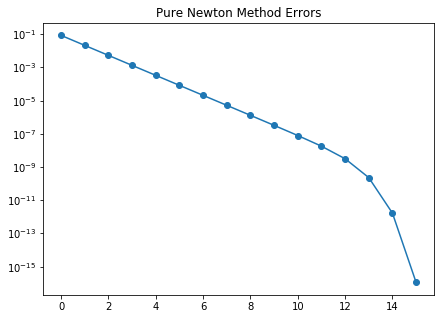

In [3]:
Ss = shf.NewtonPoly(A)
# ss = shf.SimpNewtonPoly(A)
# Ss = shf.NewtonPoly(A, X0 = np.array([[0, 1, 0],[0, 0, 1],[0, 0, 0]]))
# Ss = shf.NewtonPoly(A, X0 = 1 * np.eye(3))
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
# ax2 = fig.add_subplot(222)
# ax3 = fig.add_subplot(223)
# ax4 = fig.add_subplot(224)

ax1.semilogy(Ss['errs'],'-o')
ax1.set_title('Pure Newton Method Errors')

# ax2.semilogy(Ss['errs'],'-o')
# ax2.semilogy(ss['errs'],'-o')
# ax2.set_xlim(ax1.get_xlim())
# ax2.set_title('Simple Newton Method Errors : xlim sync')

# ax3.semilogy(Ss['errs'],'-o')
# ax3.semilogy(ss['errs'],'-o')
# ax3.set_xlim(ax1.get_xlim())
# ax3.set_ylim(ax1.get_ylim())
# ax3.set_title('Simple Newton Method Errors : xylim sync')

# ax4.semilogy(Ss['errs'],'-o')
# ax4.semilogy(ss['errs'],'-o')
# ax4.set_title('Simple Newton Method Errors')

print(Ss['sol'])

### Eigenvalues of $P'_{X_{i}}$'s 

In [4]:
# Derivative에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['P_Xs'])):
    d, ev = nla.eig(Ss['P_Xs'][i])
    Ds.append(d)
    EVs.append(ev)

In [5]:
dss = np.zeros((Ds[-1].shape[0],len(Ds)))
dss = dss.astype(complex)
for i in range(len(EVs)):
    dss[:,i] = np.squeeze(Ds[i])

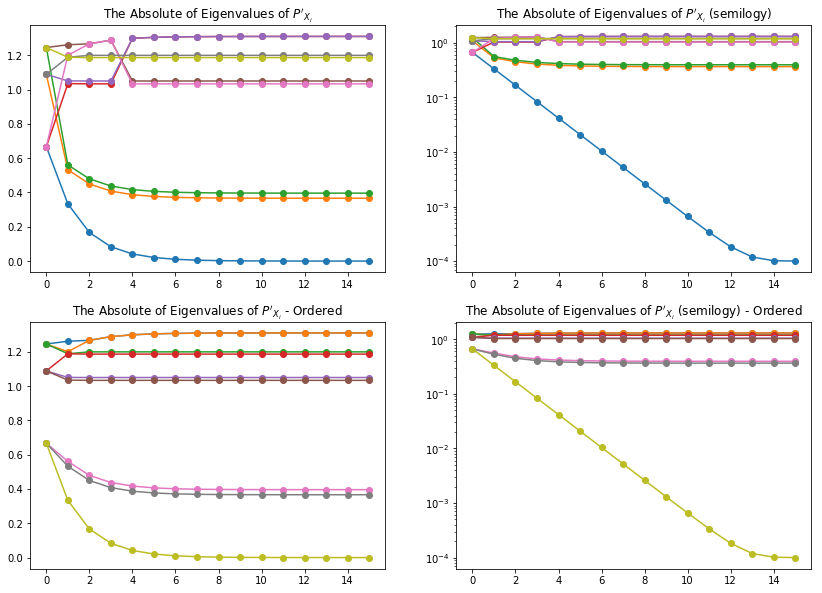

In [12]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy)")

rdss = np.sort(np.real(dss), axis = 0)
rdss = rdss[::-1,:]

idss = np.sort(np.imag(dss), axis = 0)
idss = idss[::-1,:]

adss = np.sort(np.abs(dss), axis = 0)
adss = adss[::-1,:]

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ - Ordered")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy) - Ordered")

for i in range(dss.shape[0]):
    ax1.plot(np.abs(dss[i,:]),'-o')
    ax2.semilogy(np.abs(dss[i,:]),'-o')
    ax3.plot(adss[i,:],'-o')
    ax4.semilogy(adss[i,:],'-o')

### Coefficients of Eigenvectors of $P'_{X_{i}}$ with respect to $H_{i}$

In [8]:
coeffi = np.zeros((Ss['Hs'][0].shape[0] * Ss['Hs'][0].shape[1],len(EVs)))
coeffi = coeffi.astype(complex)
for i in range(len(EVs)):
    h = nla.solve(EVs[i], np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],1), order='F'))
    coeffi[:,i] = np.squeeze(h)
# coeffi.transpose()

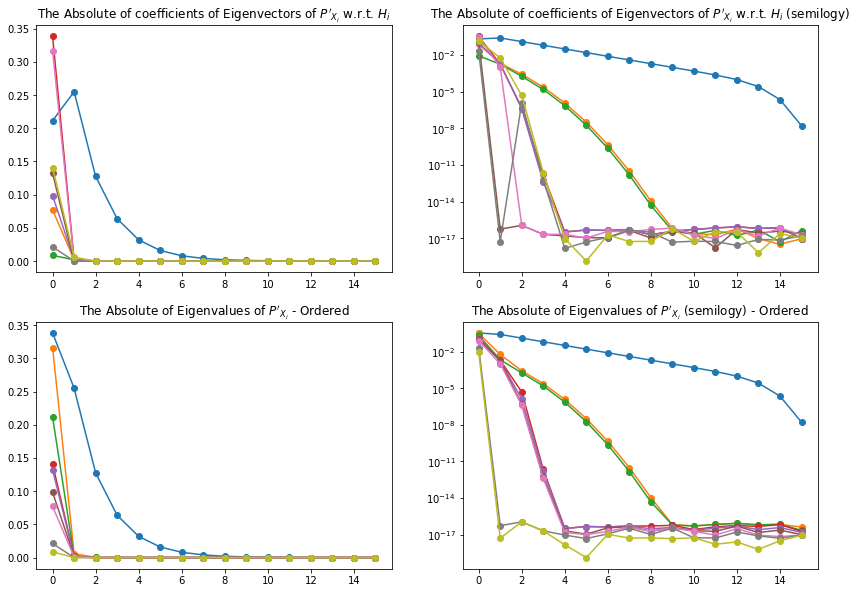

In [14]:
fig = plt.figure(figsize=(14,10))
# ax1 = fig.add_subplot(221)
# ax1.set_title("The Real part of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

# ax2 = fig.add_subplot(222)
# ax2.set_title("The Imaginary part of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

ax3 = fig.add_subplot(221)
ax3.set_title("The Absolute of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

ax4 = fig.add_subplot(222)
ax4.set_title("The Absolute of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$ (semilogy)")

ax1 = fig.add_subplot(223)
ax1.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ - Ordered")

ax2 = fig.add_subplot(224)
ax2.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy) - Ordered")

abcoe = np.sort(np.abs(coeffi), axis = 0)
abcoe = abcoe[::-1,:]

for i in range(coeffi.shape[0]):
#     ax1.plot(np.real(coeffi[i,:]),'-o')
#     ax2.plot(np.imag(coeffi[i,:]),'-o')
    ax3.plot(np.abs(coeffi[i,:]),'-o')
    ax4.semilogy(np.abs(coeffi[i,:]),'-o')
    ax1.plot(abcoe[i,:],'-o')
    ax2.semilogy(abcoe[i,:],'-o')

### Eigenvalue Analyzing $P_{X_{i}}$, $I \otimes (AX_{i} + B)$, and $X_{i}^{T} \otimes A$

In [34]:
L, R, dL, eL, dR, eR, dP, eP = [], [], [], [], [], [], [], []
for i in range(len(Ss['Xs'])-1):
    Xi = Ss['Xs'][i]
    I = np.eye(Ss['sol'].shape[0])
    L.append(np.kron(I, A[2,:,:] @ Xi + A[1,:,:]))
    R.append(np.kron(Xi.transpose(), A[2,:,:]))
    
for l, r in zip(L, R):
    d, e = nla.eig(l)
    dL.append(d)
    eL.append(e)
    d, e = nla.eig(r)
    dR.append(d)
    eR.append(e)
    
for p in Ss['P_Xs']:
    d, e = nla.eig(p)
    dP.append(d)
    eP.append(e)
    
pprint(dP)

[array([-0.6667    , -1.08838891, -1.24491109, -0.6667    , -1.08838891, -1.24491109, -0.6667    , -1.08838891, -1.24491109]),
 array([-0.33335001, -0.53252238, -0.56062051, -1.03444433, -1.05018706, -1.26108064, -1.20019797, -1.18829754, -1.18786785]),
 array([-0.16667502+0.j        , -0.44957798+0.j        , -0.47926256+0.j        , -1.03310453+0.j        , -1.04968667+0.j        , -1.26575051+0.04194422j, -1.26575051-0.04194422j,
       -1.19916594+0.j        , -1.18609021+0.j        ]),
 array([-0.08333754+0.j        , -0.40790914+0.j        , -0.43759542+0.j        , -1.0331037 +0.j        , -1.04968675+0.j        , -1.28656587+0.05981729j, -1.28656587-0.05981729j,
       -1.19916545+0.j        , -1.18608892+0.j        ]),
 array([-0.04166883+0.j        , -0.38707478+0.j        , -0.41676107+0.j        , -1.29697367+0.06751639j, -1.29697367-0.06751639j, -1.04968675+0.j        , -1.0331037 +0.j        ,
       -1.19916545+0.j        , -1.18608892+0.j        ]),
 array([-0.02083453+